# Accessing the Euro-Cordex Ensemble

In [1]:
import os
import intake
import xarray as xr
import numpy as np
from tqdm.notebook import tqdm

os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

xr.set_options(keep_attrs=True)
print(np.__version__)
print(xr.__version__)

import intake_esm
print(intake_esm.__version__)

1.20.1
0.19.0
2021.8.17


In [2]:
!echo $HDF5_USE_FILE_LOCKING

FALSE


In [3]:
from dask.distributed import Client, progress
client = Client()

In [4]:
client

<Client: 'tcp://127.0.0.1:45462' processes=6 threads=24, memory=31.25 GiB>

In [ ]:
#client.get_versions(check=True)

## Data access

In [ ]:
url = "/work/kd0956/Catalogs/mistral-cordex.json" 
cat = intake.open_esm_datastore(url)
cat

In [7]:
models = ['CLMcom-CCLM4-8-17',
     'CLMcom-BTU-CCLM4-8-17',
    'CLMcom-ETH-COSMO-crCLIM-v1-1',
     'CNRM-ALADIN53',
     'CNRM-ALADIN63',
     'DMI-HIRHAM5',
     'GERICS-REMO2015',
   #  'ICTP-RegCM4-6',  # regcm seems to make trouble when opening with to_dataset_dict..
     'IPSL-INERIS-WRF331F',
     'KNMI-RACMO22E',
    'MOHC-HadREM3-GA7-05',
     'MPI-CSC-REMO2009',
     'RMIB-UGent-ALARO-0',
     'SMHI-RCA4', 
     'UHOH-WRF361H']

In [8]:
#institute_ids = ['CLMcom', 'CLMcom-BTU', 'CLMcom-ETH', 'CNRM', 'DMI', 'GERICS',
#       'IPSL-INERIS', 'KNMI', 'MOHC', 'MPI-CSC', 'RMIB-UGent', 'SMHI',
#       'UHOH', 'z_GERICS_KB']
# there are some missleading entries in the catalog, so we state all institute ids explicitly here
# to avoid wrong ones...
institute_ids =  ['CLMcom', 'CLMcom-BTU', 'CLMcom-ETH', 'CNRM', 'DMI', 'GERICS',
        'ICTP', 'IPSL-INERIS', 'KNMI', 'MOHC', 'MPI-CSC', 'RMIB-UGent',
        'SMHI', 'UHOH', 'z_GERICS_KB']

In [9]:
scens = ['rcp26', 'rcp45', 'rcp85']
expts = ['historical'] + scens
attrs = {'variable_id': 'tas', 'frequency': 'mon', 'CORDEX_domain': 'EUR-11', 
         'experiment_id': expts, 'rcm_version_id': 'v1', 'model_id': models,
         'institute_id': institute_ids}

In [10]:
import pandas as pd
pd.set_option('display.max_rows', None)
selection = cat.search(**attrs)
selection.df.groupby(['model_id', 'institute_id', 'experiment_id', 'driving_model_id', 'member', 'frequency', 'rcm_version_id', 'version'])['variable_id'].unique().apply(list).to_frame()

variable_id
model_id                     institute_id experiment_id driving_model_id      member  frequency rcm_version_id version              
CLMcom-BTU-CCLM4-8-17        CLMcom-BTU   rcp26         MPI-M-MPI-ESM-LR      r1i1p1  mon       v1             v20171121       [tas]
CLMcom-CCLM4-8-17            CLMcom       historical    CCCma-CanESM2         r1i1p1  mon       v1             v20171121       [tas]
                                                        CNRM-CERFACS-CNRM-CM5 r1i1p1  mon       v1             v20140515       [tas]
                                                        ICHEC-EC-EARTH        r12i1p1 mon       v1             v20140515       [tas]
                                                        MIROC-MIROC5          r1i1p1  mon       v1             v20171121       [tas]
                                                        MOHC-HadGEM2-ES       r1i1p1  mon       v1             v20150320       [tas]
                                                        MPI-M-MPI-ESM-LR      r1i1p1  mon       v1             v20140515       [tas]
                                          rcp26         ICHEC-EC-EARTH        r12i1p1 mon       v1             v20170523       [tas]
                                                        MIROC-MIROC5          r1i1p1  mon       v1             v20180707       [tas]
                                          rcp45         CNRM-CERFACS-CNRM-CM5 r1i1p1  mon       v1             v20140515       [tas]
                                                        ICHEC-EC-EARTH        r12i1p1 mon       v1             v20140515       [tas]
                                                        MOHC-HadGEM2-ES       r1i1p1  mon       v1             v20150320       [tas]
                                                        MPI-M-MPI-ESM-LR      r1i1p1  mon       v1             v20140515       [tas]
                                          rcp85         CCCma-CanESM2         r1i1p1  mon       v1             v20171121       [tas]
                                                        CNRM-CERFACS-CNRM-CM5 r1i1p1  mon       v1             v20140515       [tas]
                                                        ICHEC-EC-EARTH        r12i1p1 mon       v1             v20140515       [tas]
                                                        MIROC-MIROC5          r1i1p1  mon       v1             v20171121       [tas]
                                                        MOHC-HadGEM2-ES       r1i1p1  mon       v1             v20150320       [tas]
                                                        MPI-M-MPI-ESM-LR      r1i1p1  mon       v1             v20140515       [tas]
CLMcom-ETH-COSMO-crCLIM-v1-1 CLMcom-ETH   historical    CNRM-CERFACS-CNRM-CM5 r1i1p1  mon       v1             v20210308       [tas]
                                                        ICHEC-EC-EARTH        r12i1p1 mon       v1             v20191210       [tas]
                                                                              r1i1p1  mon       v1             v20201215       [tas]
                                                                              r3i1p1  mon       v1             v20201209       [tas]
                                                        MOHC-HadGEM2-ES       r1i1p1  mon       v1             v20200609       [tas]
                                                        MPI-M-MPI-ESM-LR      r1i1p1  mon       v1             v20191219       [tas]
                                                                              r2i1p1  mon       v1             v20200211       [tas]
                                                                              r3i1p1  mon       v1             v20200424       [tas]
                                                        NCC-NorESM1-M         r1i1p1  mon       v1             v20191210       [tas]
                                          rcp85         CNRM-CERFACS-CNRM-CM5 r1i1p1  mon       v1             v20210430       [tas

In [11]:
selection.df.institute_id.unique()

array(['CLMcom', 'CLMcom-BTU', 'CLMcom-ETH', 'CNRM', 'DMI', 'GERICS',
       'IPSL-INERIS', 'KNMI', 'MOHC', 'MPI-CSC', 'RMIB-UGent', 'SMHI',
       'UHOH', 'z_GERICS_KB'], dtype=object)

In [12]:
#selection['EUR-11.MIROC-MIROC5.UHOH.UHOH-WRF361H.rcp85.mon'].df

In [13]:
dset_dict = selection.to_dataset_dict(cdf_kwargs = {"use_cftime": True, "chunks": {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'CORDEX_domain.driving_model_id.institute_id.model_id.experiment_id.frequency'


We move the member id from a coordinate to the dsets key so that all datasets have the same structure...

In [14]:
#dsets_sorted = defaultdict(dict)
keys = 'CORDEX_domain.driving_model_id.institute_id.model_id.experiment_id.frequency'.split('.')

dset_split = {}

for key, ds in tqdm(dset_dict.items()):
    attrs = dict(zip(keys, [attr for attr in key.split('.')]))
    for member, ds_member in ds.groupby('member'):
        dset_split[key+'.'+member] = ds_member

  0%|          | 0/141 [00:00<?, ?it/s]

we concentrate on rotated pole grids for now. there are just a handful of lambert conformal projection models that we can deal later with.

In [15]:
def is_rotated(ds):
    rotated = ['rotated_pole', 'rotated_latitude_longitude']
    return any(rot in ds for rot in rotated)

dset_rotated = {key: dset for key, dset in dset_split.items() if is_rotated(dset)}
dset_other = {key: dset for key, dset in dset_split.items() if not is_rotated(dset)}
#list(dset_rotated.keys())
dset_rotated['EUR-11.ICHEC-EC-EARTH.DMI.DMI-HIRHAM5.historical.mon.r3i1p1']
dset_rotated['EUR-11.MPI-M-MPI-ESM-LR.GERICS.GERICS-REMO2015.historical.mon.r3i1p1']

<xarray.Dataset>
Dimensions:                     (time: 671, bnds: 2, rlat: 412, rlon: 424, vertices: 4)
Coordinates:
  * time                        (time) object 1950-02-15 00:00:00 ... 2005-12...
  * rlat                        (rlat) float64 -23.38 -23.27 ... 21.72 21.84
  * rlon                        (rlon) float64 -28.38 -28.27 ... 18.04 18.16
    lat                         (rlat, rlon) float32 dask.array<chunksize=(412, 424), meta=np.ndarray>
    lon                         (rlat, rlon) float32 dask.array<chunksize=(412, 424), meta=np.ndarray>
    height                      float64 ...
    member                      <U6 'r3i1p1'
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) object dask.array<chunksize=(11, 2), meta=np.ndarray>
    rotated_latitude_longitude  int32 ...
    lat_vertices                (rlat, rlon, vertices) float32 dask.array<chunksize=(412, 424, 4), meta=np.ndarray>
    lon_vertices                (rlat, rlon, vertices) float32 dask.array<chunksize=(412, 424, 4), meta=np.ndarray>
    tas                         (time, rlat, rlon) float32 dask.array<chunksize=(11, 412, 424), meta=np.ndarray>
Attributes: (12/37)
    driving_experiment:             MPI-M-MPI-ESM-LR, historical, r3i1p1
    references:                     http://www.remo-rcm.de
    table_id:                       Table mon (Mar 2015) c0a10bad89df35dfced7...
    modeling_realm:                 atmos
    history:                        There is no special history for this expe...
    source:                         GERICS-REMO2015
    ...                             ...
    creation_date:                  2019-06-19T15:44:08Z
    contact:                        gerics-cordex@hzg.de
    experiment_id:                  historical
    CORDEX_domain:                  EUR-11
    realization:                    3
    intake_esm_dataset_key:         EUR-11.MPI-M-MPI-ESM-LR.GERICS.GERICS-REM...

In [16]:
#ds = dset_rotated['EUR-11.MIROC-MIROC5.UHOH.UHOH-WRF361H.rcp85.mon.r1i1p1']
#ds.tas.assign_coords()

#.tas.isel(time=0)#.plot(x='rlon', y='rlat')

Now, we concatenate scenarion data with historical data for easier comparisons:

In [17]:
from tqdm.autonotebook import tqdm
from collections import defaultdict

#dsets_dict = defaultdict(dict)
keys = 'CORDEX_domain.driving_model_id.institute_id.model_id.experiment_id.frequency.member'.split('.')


# skip datasets, see issue: https://github.com/euro-cordex/py-cordex/issues/17
skip = ['EUR-11.MIROC-MIROC5.UHOH.UHOH-WRF361H.historical.mon.r1i1p1',
        'EUR-11.MPI-M-MPI-ESM-LR.UHOH.UHOH-WRF361H.historical.mon.r1i1p1',
        'EUR-11.MPI-M-MPI-ESM-LR.UHOH.UHOH-WRF361H.historical.mon.r1i1p1']



# this will make coordinates out of the dataset attributes

#for key, ds in tqdm(dset_rotated.items()):
#    attrs = dict(zip(keys, [[attr] for attr in key.split('.')]))
#    dsets_expanded[key] = ds.expand_dims(attrs)

# lets concatenate all scnearios with their historical part 
dsets_concat = defaultdict(dict)
for key, ds in tqdm(dset_rotated.items()):
    attrs = dict(zip(keys, [attr for attr in key.split('.')]))
    print(key)
    if attrs['experiment_id'] == 'historical' and key not in skip:
        #print(attrs)
        for exp_id in scens:
            # create the scenarion id and concat it with historical
            attrs['experiment_id'] = exp_id
            scen_key = '.'.join(attrs.values())
            if scen_key in dset_rotated:
                #print('concat: ', key, scen_key)
                ds_scen = dset_rotated[scen_key]
                dsets_concat[scen_key] = xr.concat([ds.squeeze(), ds_scen.squeeze()], dim='time', compat='override',
                                                  coords='minimal', data_vars='minimal')#.to_dataset()
                dsets_concat[scen_key].attrs = ds_scen.attrs
        #print(dset_key == key)
        #dsets_concat[key]

<ipython-input-17-d774b220a4e5>:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/157 [00:00<?, ?it/s]

EUR-11.ICHEC-EC-EARTH.UHOH.UHOH-WRF361H.historical.mon.r12i1p1
EUR-11.NOAA-GFDL-GFDL-ESM2G.GERICS.GERICS-REMO2015.historical.mon.r1i1p1
EUR-11.MOHC-HadGEM2-ES.SMHI.SMHI-RCA4.historical.mon.r1i1p1
EUR-11.ICHEC-EC-EARTH.MOHC.MOHC-HadREM3-GA7-05.rcp26.mon.r12i1p1
EUR-11.IPSL-IPSL-CM5A-MR.IPSL-INERIS.IPSL-INERIS-WRF331F.rcp85.mon.r1i1p1
EUR-11.MPI-M-MPI-ESM-LR.SMHI.SMHI-RCA4.rcp45.mon.r1i1p1
EUR-11.ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.historical.mon.r12i1p1
EUR-11.MPI-M-MPI-ESM-LR.GERICS.GERICS-REMO2015.historical.mon.r3i1p1
EUR-11.MPI-M-MPI-ESM-LR.CLMcom.CLMcom-CCLM4-8-17.rcp45.mon.r1i1p1
EUR-11.NCC-NorESM1-M.GERICS.GERICS-REMO2015.rcp45.mon.r1i1p1
EUR-11.MOHC-HadGEM2-ES.SMHI.SMHI-RCA4.rcp45.mon.r1i1p1
EUR-11.ICHEC-EC-EARTH.SMHI.SMHI-RCA4.rcp45.mon.r12i1p1
EUR-11.CNRM-CERFACS-CNRM-CM5.CLMcom.CLMcom-CCLM4-8-17.rcp45.mon.r1i1p1
EUR-11.MOHC-HadGEM2-ES.GERICS.GERICS-REMO2015.rcp85.mon.r1i1p1
EUR-11.MOHC-HadGEM2-ES.DMI.DMI-HIRHAM5.rcp85.mon.r1i1p1
EUR-11.MIROC-MIROC5.CLMcom.CLMcom-CCLM4-8-1

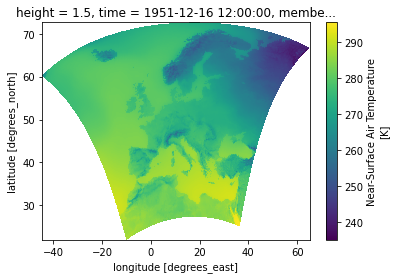

In [18]:
dsets_concat["EUR-11.ICHEC-EC-EARTH.MOHC.MOHC-HadREM3-GA7-05.rcp26.mon.r12i1p1"].tas.isel(time=0).plot(x='longitude', y='latitude')

Now, we have to align the different coordinats. The ensemble members might have slightly different rotated coordinates and also the projection to the global coordinates might be different. We use a reference dataset here, from wich we copy the coordinates to all datasets to make them comparable.

In [19]:
from datetime import datetime as dt

dsets_sorted = defaultdict(dict)
keys = 'CORDEX_domain.driving_model_id.institute_id.model_id.experiment_id.frequency.member'.split('.')
new_keys = 'driving_model_id.institute_id.model_id.member'.split('.')

ref_key = 'EUR-11.IPSL-IPSL-CM5A-MR.GERICS.GERICS-REMO2015.rcp85.mon.r1i1p1'

ref_ds = dset_dict['EUR-11.ICHEC-EC-EARTH.GERICS.GERICS-REMO2015.historical.mon'] 

#rlon = dsets_concat[ref_key].rlon
#rlat = dsets_concat[ref_key].rlat
#lon = dsets_concat[ref_key].lon
#lat = dsets_concat[ref_key].lat

rlon = ref_ds.rlon
rlat = ref_ds.rlat
lon = ref_ds.lon
lat = ref_ds.lat

for key, ds in tqdm(dsets_concat.items()):
    attrs = dict(zip(keys, [attr for attr in key.split('.')]))
    # overwrite all coordinates consistently, we use the ref datasets coordinates here...
    try:
        # rename
        ds = ds.rename({'latitude': 'lat', 'longitude': 'lon'})
        #ds.drop('longitude')
        print("renaming coords on "+key)
    except:
        pass
    ds.coords['time'] = [dt(date.year, date.month, 15) for date in ds.time.values]
    ds['rlon'] = rlon
    ds['rlat'] = rlat
    ds['lon'] = lon
    ds['lat'] = lat
    
    new_key = '.'.join([attrs[attr] for attr in new_keys])
    
    scen = attrs['experiment_id']
    dsets_sorted[scen][new_key] = ds.squeeze(drop=True)
    #print(new_key)

  0%|          | 0/93 [00:00<?, ?it/s]

renaming coords on EUR-11.MPI-M-MPI-ESM-LR.MOHC.MOHC-HadREM3-GA7-05.rcp85.mon.r1i1p1
renaming coords on EUR-11.MOHC-HadGEM2-ES.MOHC.MOHC-HadREM3-GA7-05.rcp26.mon.r1i1p1
renaming coords on EUR-11.MOHC-HadGEM2-ES.MOHC.MOHC-HadREM3-GA7-05.rcp85.mon.r1i1p1
renaming coords on EUR-11.NCC-NorESM1-M.MOHC.MOHC-HadREM3-GA7-05.rcp85.mon.r1i1p1
renaming coords on EUR-11.ICHEC-EC-EARTH.MOHC.MOHC-HadREM3-GA7-05.rcp26.mon.r12i1p1
renaming coords on EUR-11.ICHEC-EC-EARTH.MOHC.MOHC-HadREM3-GA7-05.rcp85.mon.r12i1p1


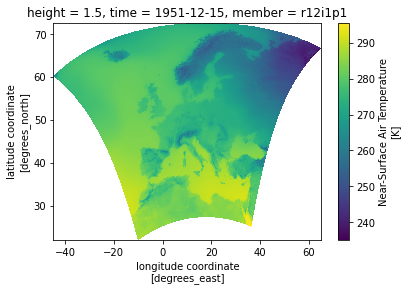

In [20]:
dsets_sorted['rcp26']['ICHEC-EC-EARTH.MOHC.MOHC-HadREM3-GA7-05.r12i1p1'].tas.isel(time=0).plot(x='lon', y='lat')#.drop('latitude')

The idea to make the whole dataset id a coordinate, so that xarray will automatically do all stuff for all datasets...

In [21]:
# make the dataset id a coordinate for easier access
dims = {}
for rcp, dsets in dsets_sorted.items():
    dset_ids = list(dsets.keys())
    dim = xr.DataArray(dset_ids, dims='dset_id', name='dset_id',
                      coords={'dset_id': dset_ids})
    dims[rcp] = dim

we create three big datasets for each senario one:

In [22]:
ensemble_dict = {}

for scen, dsets in dsets_sorted.items():
    print(scen)
    ensemble_dict[scen] = xr.concat([ds.tas for ds in dsets.values()], dim=dims[scen], 
                                    coords='minimal', compat='override')

rcp85
rcp26
rcp45


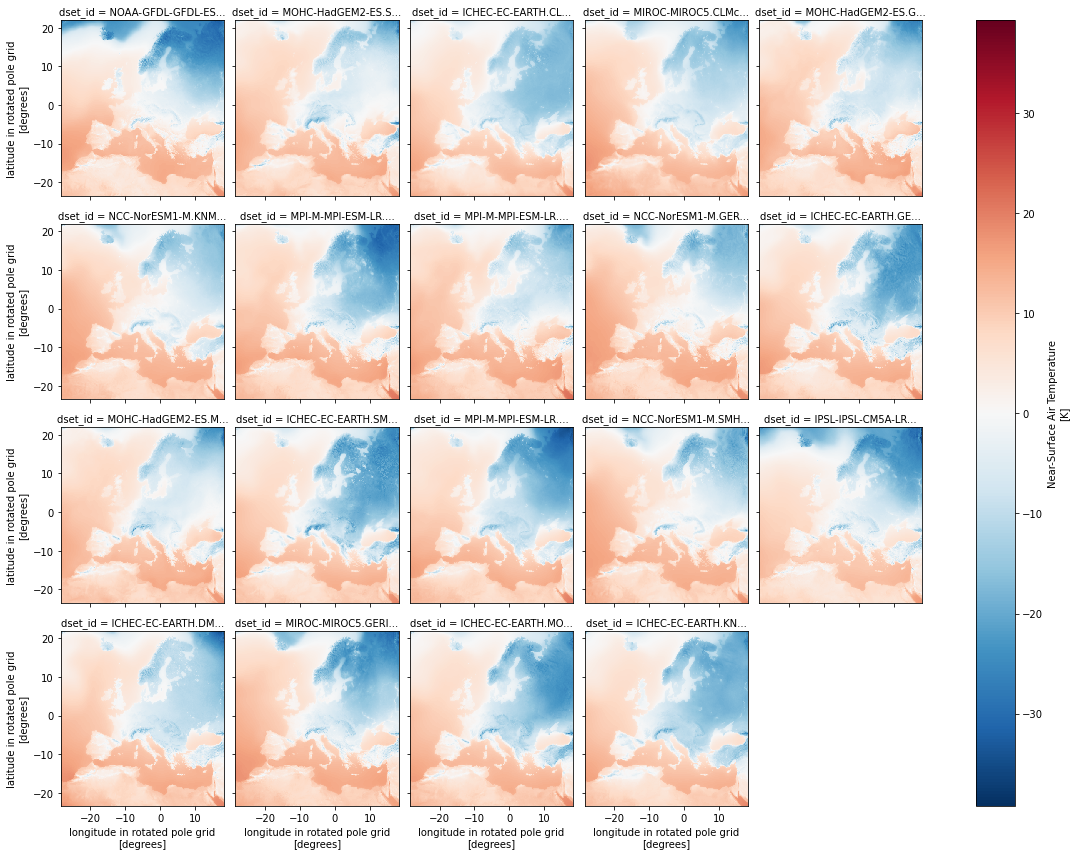

In [26]:
(ensemble_dict['rcp26'].sel(time="1970-01")-273.5).plot(col="dset_id", col_wrap=5, x='rlon', y='rlat')

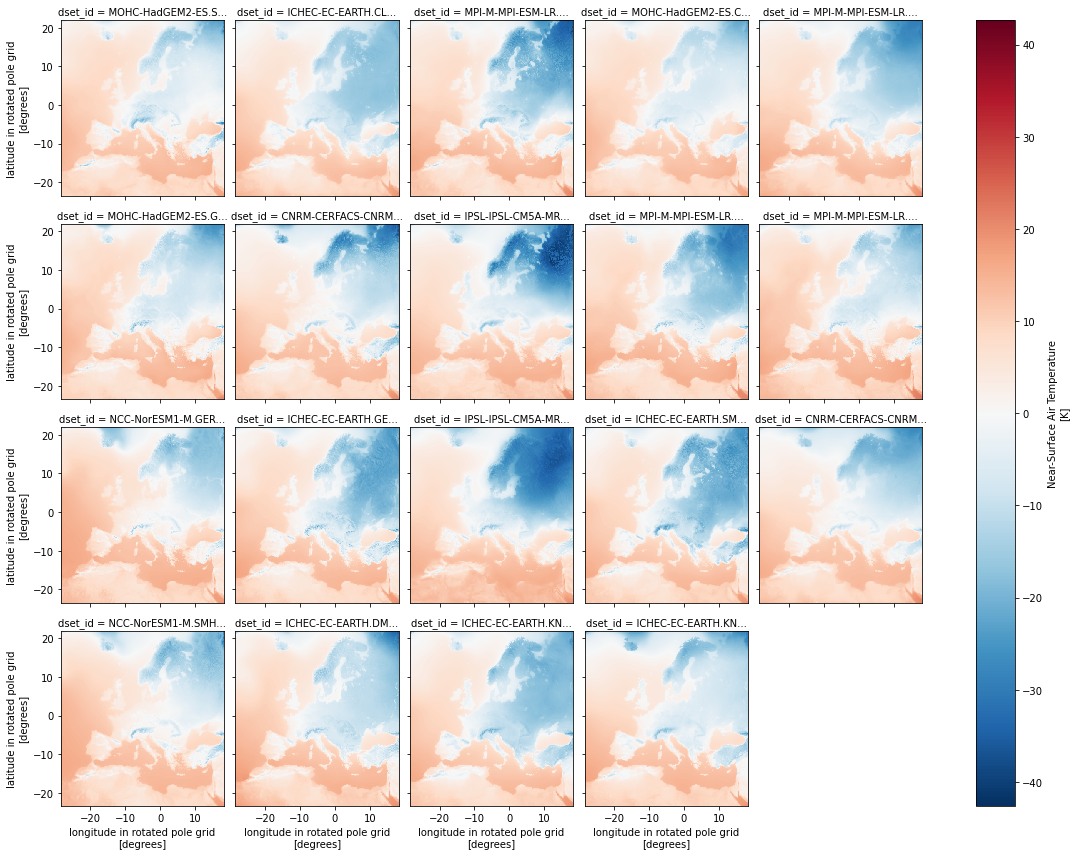

In [27]:
(ensemble_dict['rcp45'].sel(time="1970-01")-273.5).plot(col="dset_id", col_wrap=5, x='rlon', y='rlat')

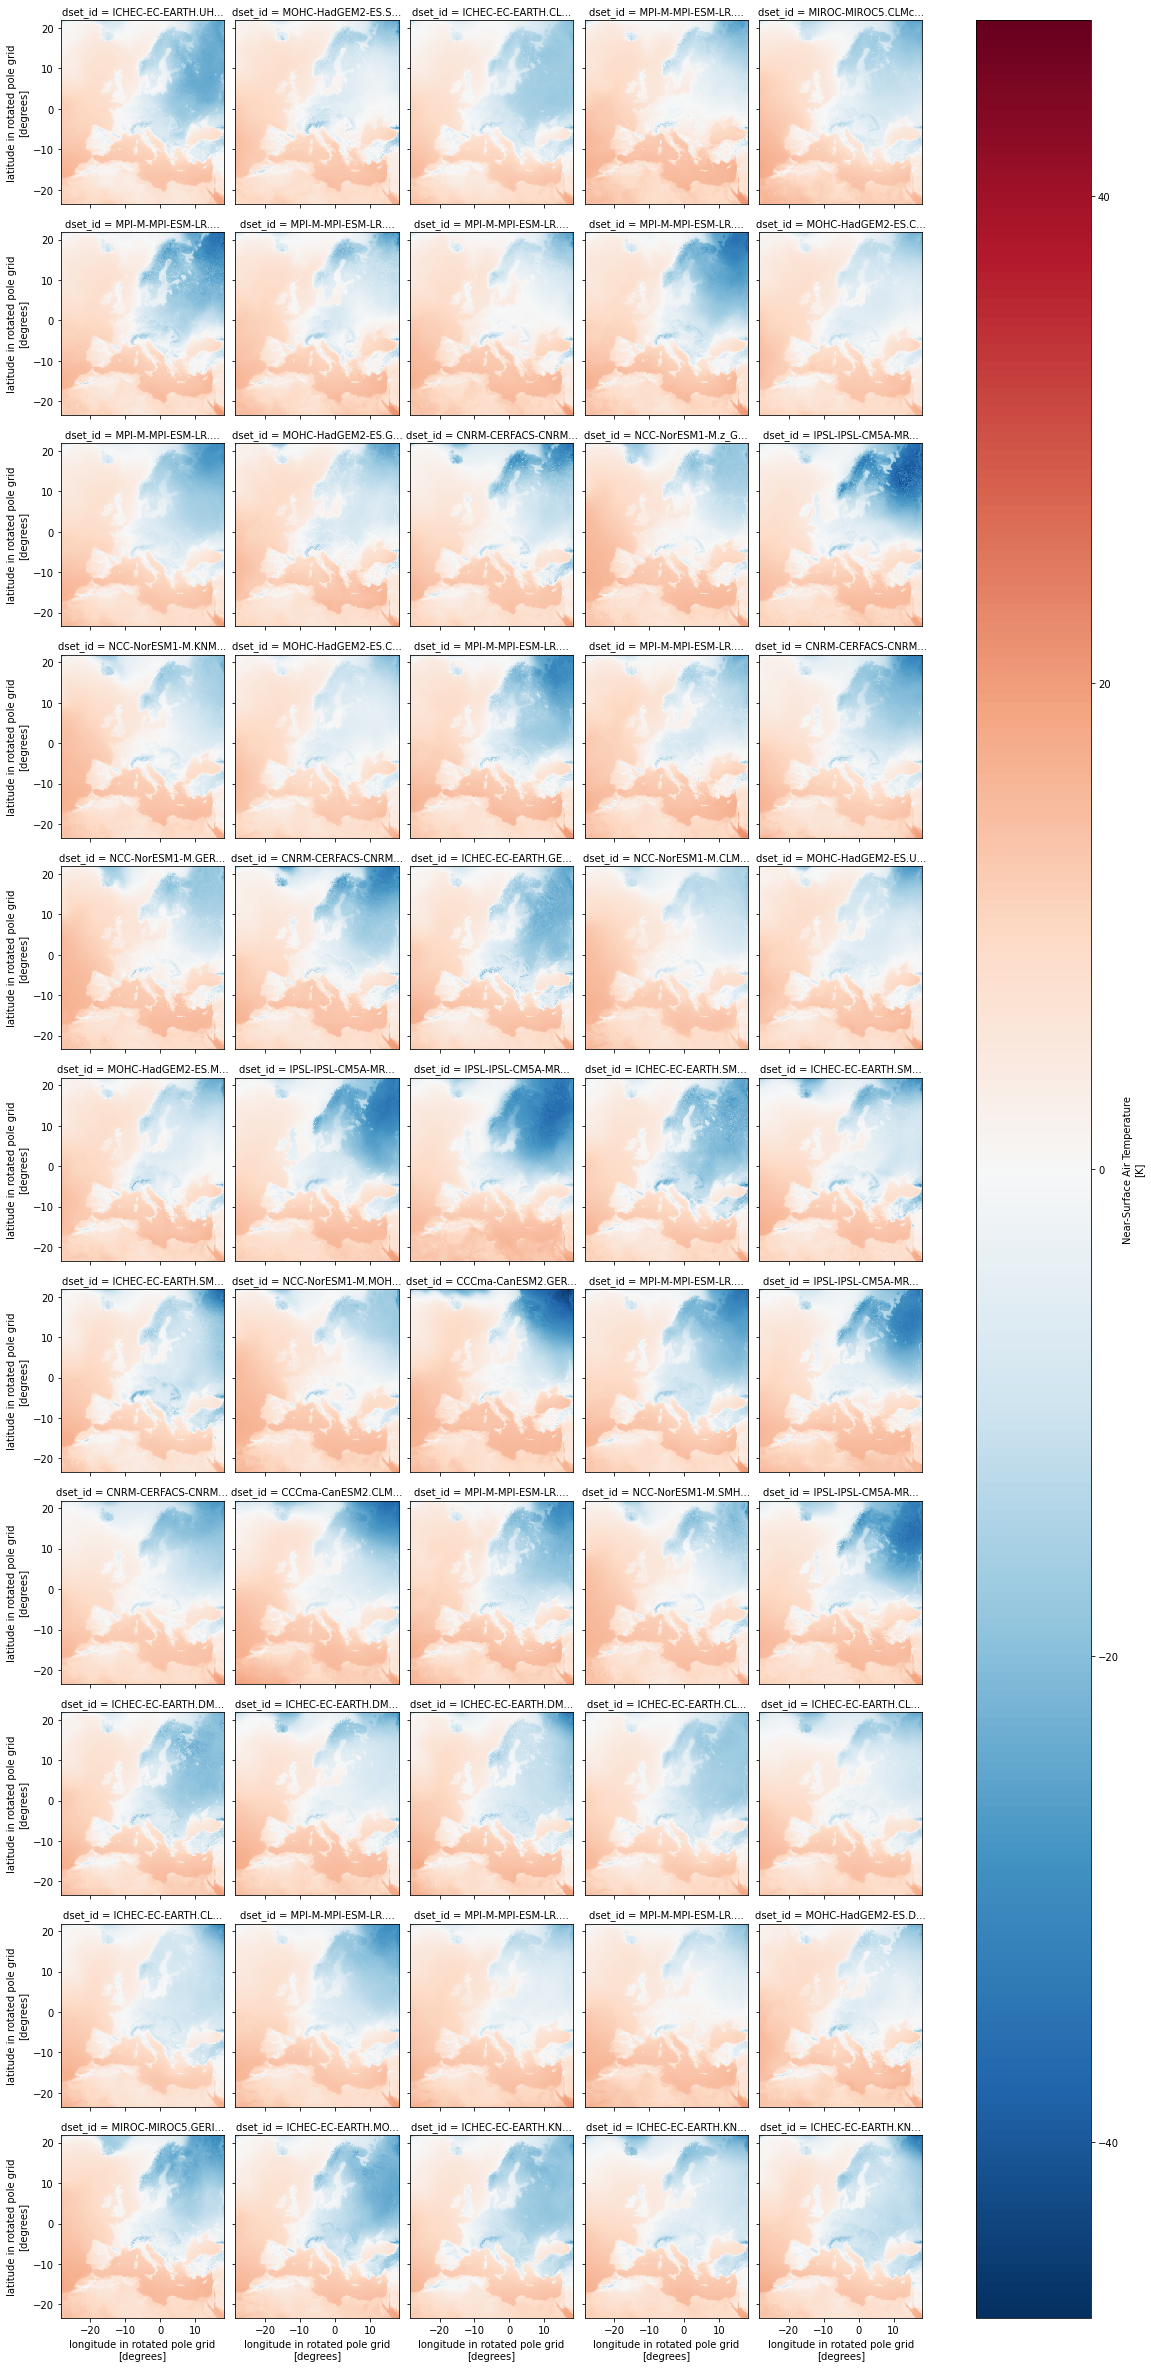

In [28]:
(ensemble_dict['rcp85'].sel(time="1970-01")-273.5).plot(col="dset_id", col_wrap=5, x='rlon', y='rlat')

In [29]:
def compute_annual_change(ds, ref_period=slice("1970", "2000")):
    import dask
    with dask.config.set(**{'array.slicing.split_large_chunks': False}):
        reference = ds.sel(time=ref_period).mean(dim="time")
        return ds.groupby("time.year").mean(dim="time") - reference

In [30]:
changes = {scen: compute_annual_change(ds) for scen, ds in ensemble_dict.items()}

Now, we write our results to disk to save our gridded data. The datasets are quite big, e.g., the size of the rcp85 ensemble in the memory would be:

In [31]:
changes['rcp85'].nbytes / 1.e9 #GB

11.75999616

## writing results to disk

So, the best way seems to be to compute and write those results to disk to make our memory available for further computations. We will trigger the computation now by writing a Netcdf file for each experiment id.

In [32]:
%time changes['rcp26'].to_netcdf("/scratch/g/g300046/EUR-11_changes_rcp26.nc")

CPU times: user 1min 4s, sys: 6.92 s, total: 1min 11s
Wall time: 3min 29s


In [33]:
%time changes['rcp45'].to_netcdf("/scratch/g/g300046/EUR-11_changes_rcp45.nc")

CPU times: user 58.7 s, sys: 5.31 s, total: 1min 3s
Wall time: 2min 43s


In [34]:
%time changes['rcp85'].to_netcdf("/scratch/g/g300046/EUR-11_changes_rcp85.nc")

CPU times: user 4min 18s, sys: 22.6 s, total: 4min 41s
Wall time: 13min 42s


Now, we will read back our data from disk, so that we can easily work with that data without persisting in in memory.

In [5]:
changes_rcp26 = xr.open_dataset("/scratch/g/g300046/EUR-11_changes_rcp26.nc", chunks="auto", use_cftime=True)
changes_rcp45 = xr.open_dataset("/scratch/g/g300046/EUR-11_changes_rcp45.nc", chunks="auto", use_cftime=True)
changes_rcp85 = xr.open_dataset("/scratch/g/g300046/EUR-11_changes_rcp85.nc", chunks="auto", use_cftime=True)

In [6]:
timeseries_rcp26 = changes_rcp26.mean(dim=('rlon', 'rlat')).compute()
timeseries_rcp45 = changes_rcp45.mean(dim=('rlon', 'rlat')).compute()
timeseries_rcp85 = changes_rcp85.mean(dim=('rlon', 'rlat')).compute()

We can also now concatenate all scenario datasets into one big ensemble dataset for easy exploration.

In [33]:
rcps = ['rcp26', 'rcp45', 'rcp85']
rcp_dim = xr.DataArray(rcps, dims='experiment_id', name='experiment_id',
                      coords={'experiment_id': rcps})
ensemble = xr.concat([timeseries_rcp26, timeseries_rcp45, timeseries_rcp85], dim=rcp_dim)

NameError: name 'timeseries_rcp26' is not defined

In [34]:
changes = xr.concat([changes_rcp26, changes_rcp45, changes_rcp85], dim=rcp_dim)

/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexe

In [10]:
ensemble

<xarray.Dataset>
Dimensions:        (experiment_id: 3, dset_id: 57, year: 153)
Coordinates:
  * experiment_id  (experiment_id) <U5 'rcp26' 'rcp45' 'rcp85'
  * dset_id        (dset_id) object 'CCCma-CanESM2.CLMcom.CLMcom-CCLM4-8-17.r...
    height         float64 2.0
    member         (experiment_id) <U7 'r1i1p1' 'r1i1p1' 'r12i1p1'
  * year           (year) int64 1948 1949 1950 1951 1952 ... 2097 2098 2099 2100
Data variables:
    tas            (experiment_id, dset_id, year) float64 nan nan ... nan nan

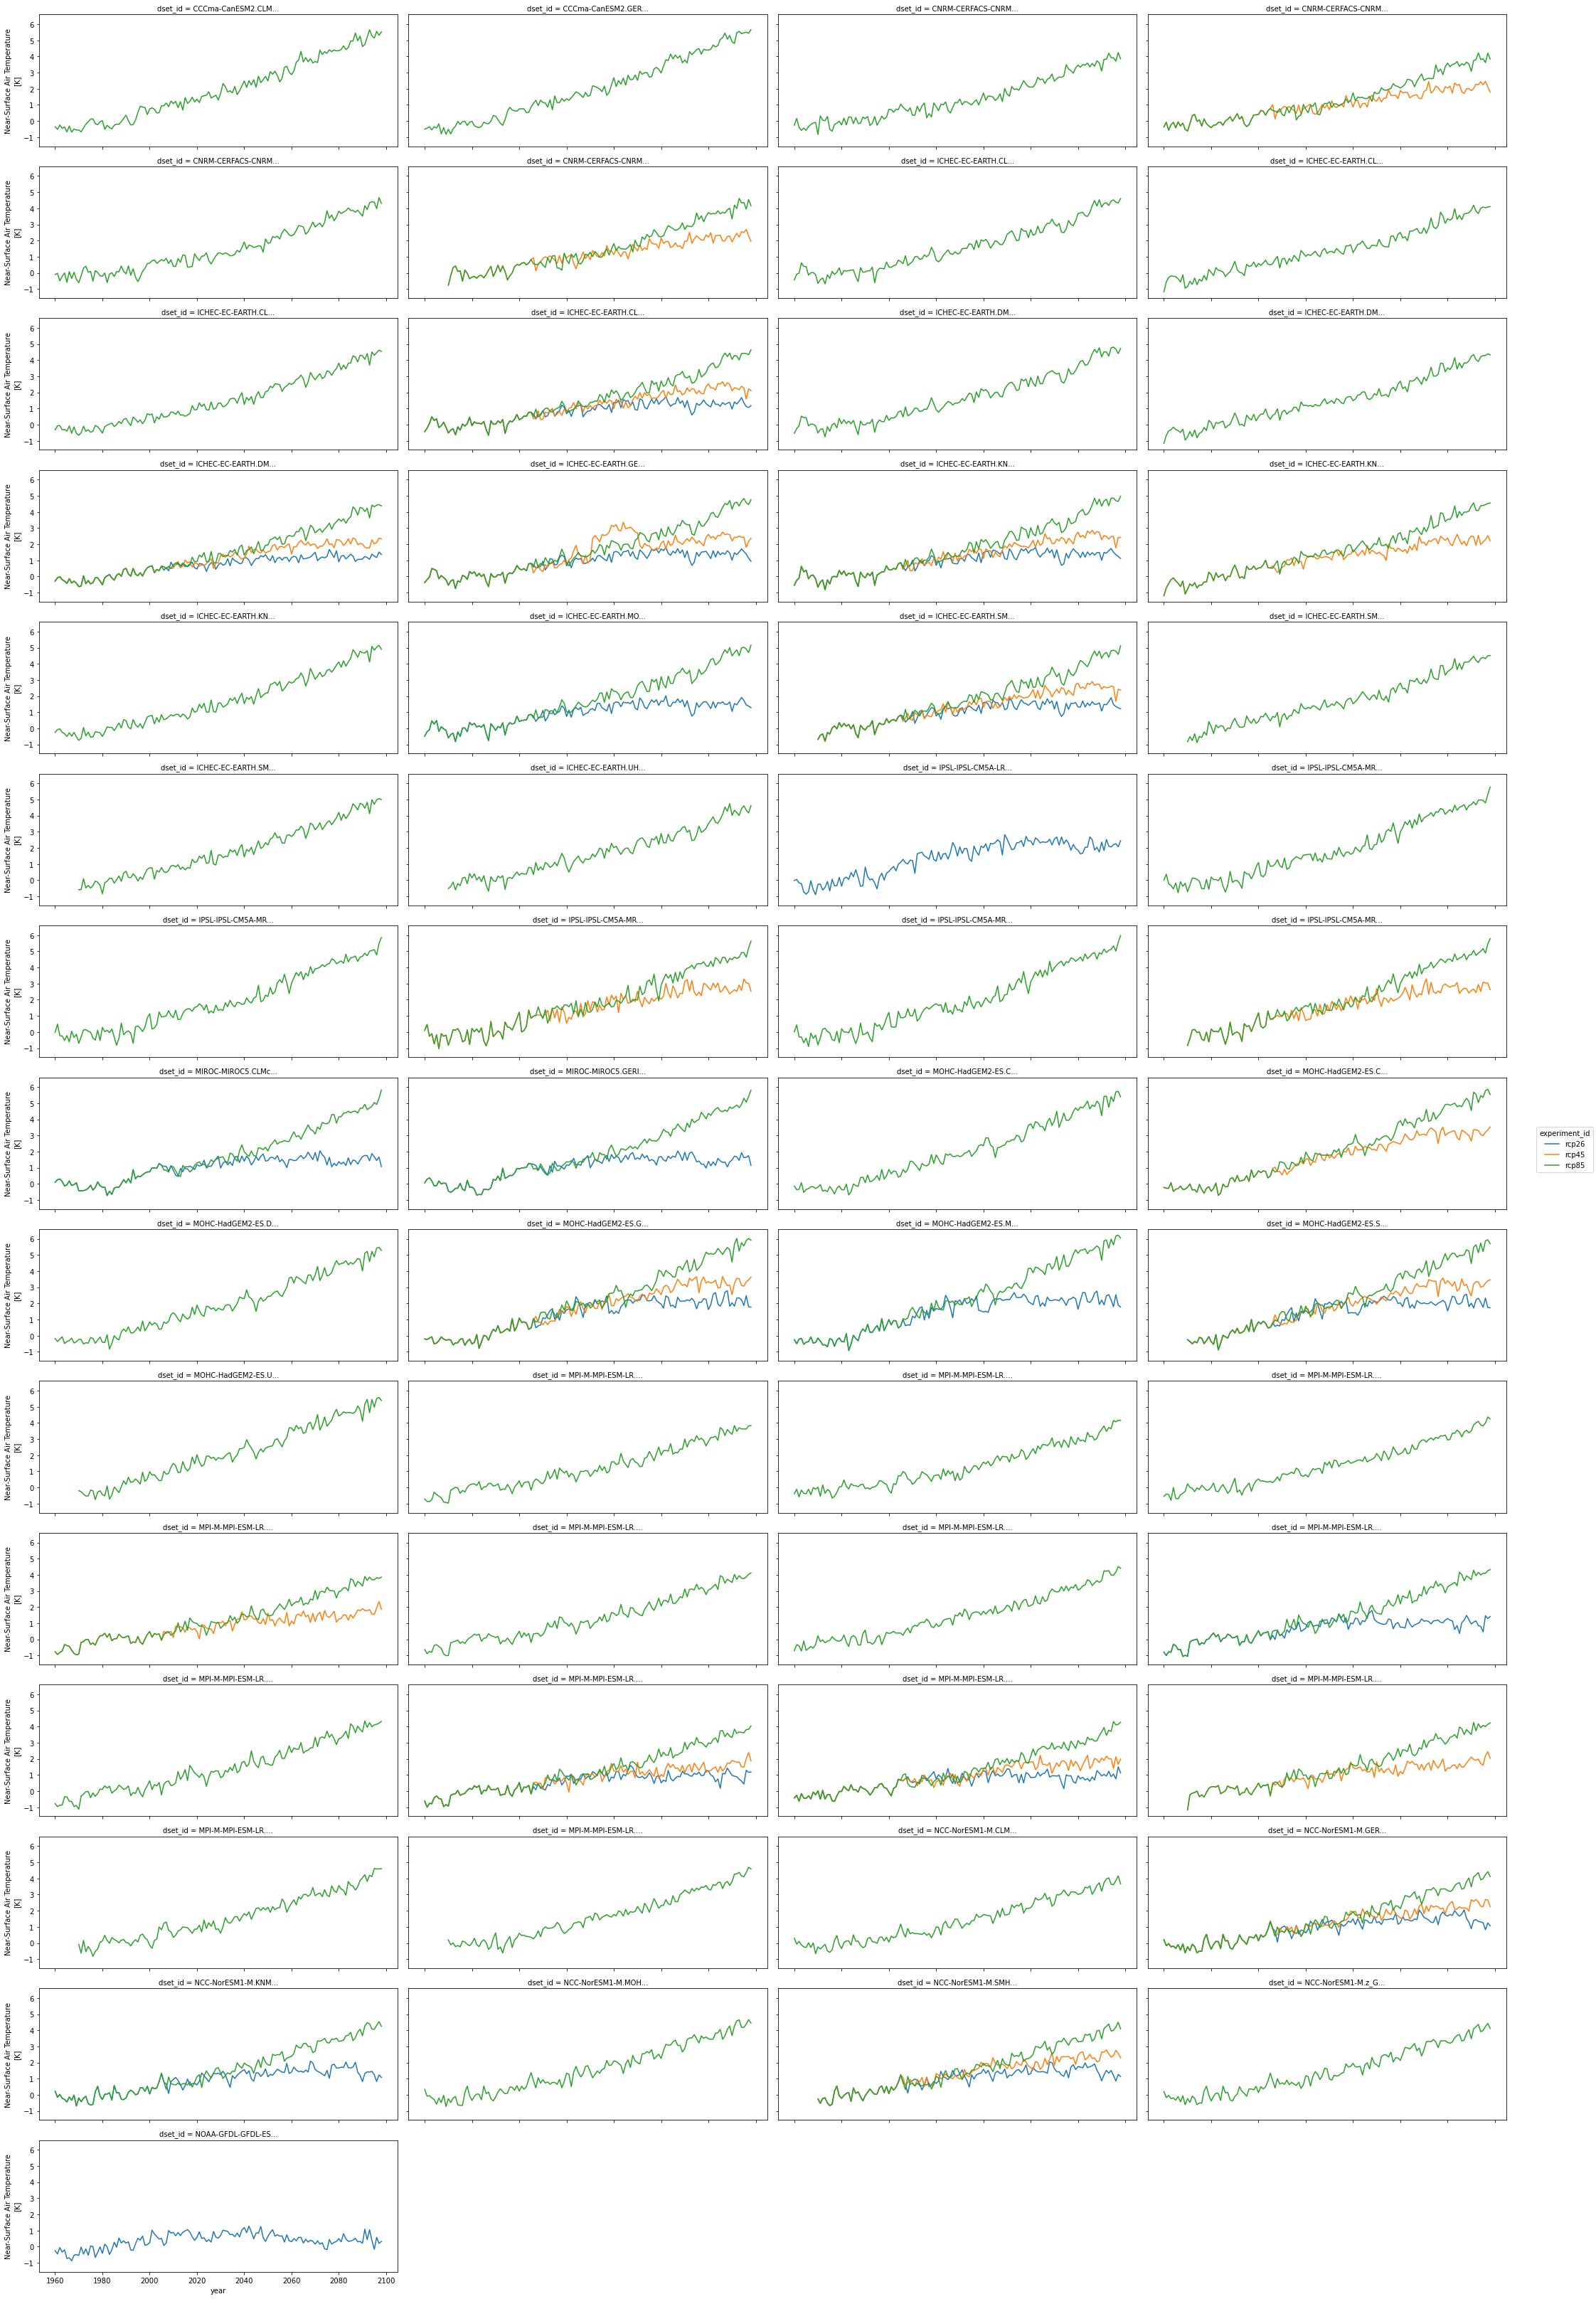

In [11]:
ensemble.tas.sel(year=slice(1960,2098)).plot(col='dset_id', col_wrap=4, hue="experiment_id", figsize=(30,45))

In [12]:
df = ensemble.tas.sel(year=slice(1960,2098)).to_dataframe().reset_index()

In [13]:
# drop empty entries
df = df.drop(df[df.tas.isnull()].index)

In [14]:
df.head()

experiment_id                                          dset_id  year  \
1251         rcp26  ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1960   
1252         rcp26  ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1961   
1253         rcp26  ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1962   
1254         rcp26  ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1963   
1255         rcp26  ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1964   

      height  member       tas  
1251     2.0  r1i1p1 -0.427760  
1252     2.0  r1i1p1 -0.215331  
1253     2.0  r1i1p1  0.073949  
1254     2.0  r1i1p1  0.491406  
1255     2.0  r1i1p1  0.265898

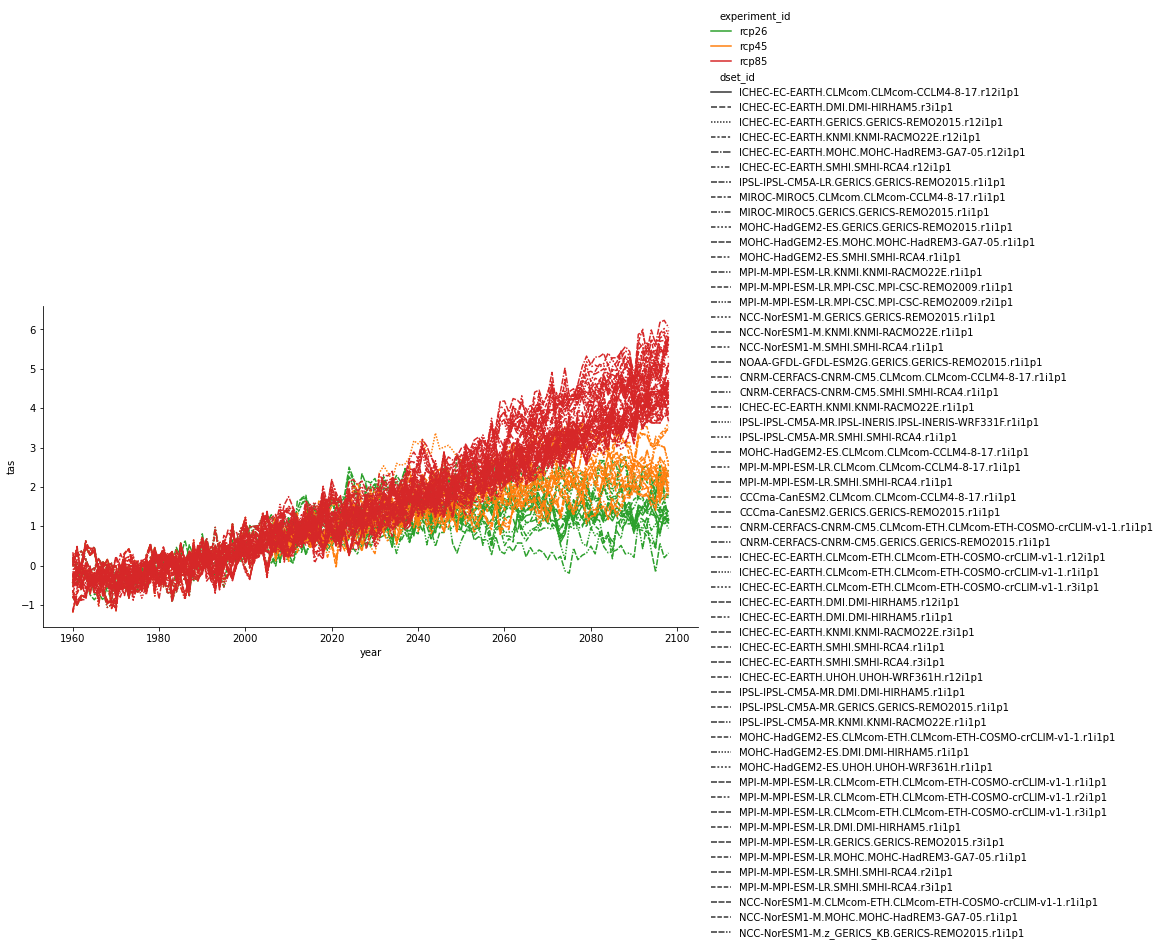

In [15]:
import seaborn as sns
palette ={"historical": "C0", "rcp26": "C2", "rcp45": "C1", "rcp85": "C3"}
sns.relplot(data=df,
            x="year", y="tas", hue='experiment_id',
            kind="line", style='dset_id', aspect=2, palette=palette);

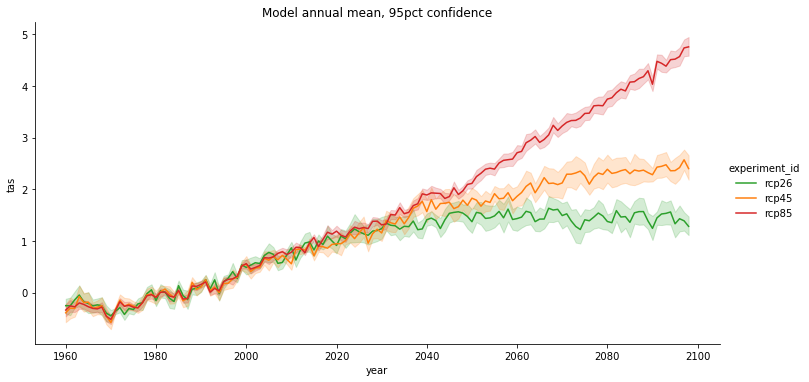

In [16]:
g = sns.relplot(data=df,
            x="year", y="tas", hue="experiment_id",
            kind="line", ci=95, aspect=2, palette=palette);
g.set(title="Model annual mean, 95pct confidence")

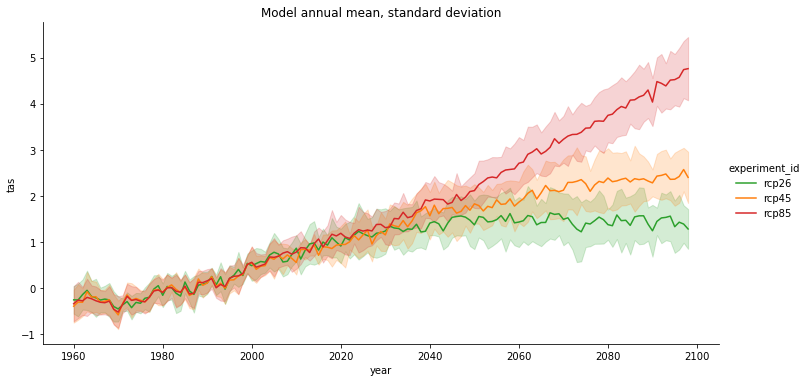

In [17]:
g = sns.relplot(data=df,
            x="year", y="tas", hue="experiment_id",
            kind="line", ci='sd', aspect=2, palette=palette);
g.set(title="Model annual mean, standard deviation")

## Add a regions coordinate

In [10]:
changes = {
    'rcp26': changes_rcp26,
    'rcp45': changes_rcp45,
    'rcp85': changes_rcp85
    }

In [8]:
import cordex as cx
germany = cx.regions.germany.regionmask()

/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/regionmask/core/regions.py:410: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in poly:


/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/regionmask/core/plot.py:151: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/regionmask/core/utils.py:18: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  polys += list(p)
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/regionmask/core/utils.py:18: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polys += list(p)
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/regionmask/core/plot.py:12:

<GeoAxesSubplot:>

/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) 

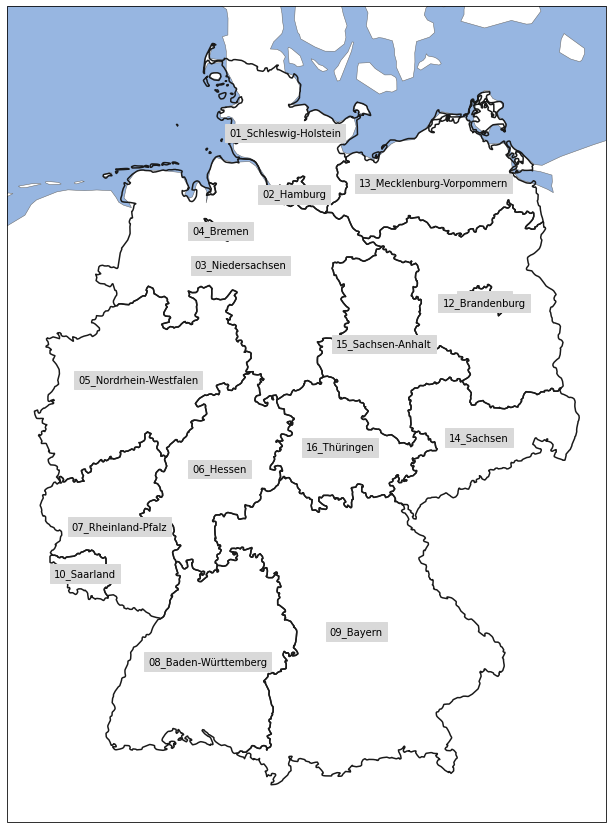

In [9]:
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

proj = ccrs.LambertConformal(central_longitude=15)
germany.plot(add_ocean=True, proj=proj, resolution="50m", label="name")

In [11]:
def regional_mean_germany(ds):
    """compute weighted regional means for germany"""
    mask = cx.regions.germany.regionmask().mask_3D(ds)
    weight = np.cos(np.deg2rad(ds.rlat))
    return ds.weighted(mask * weight).mean(dim=("rlat", "rlon"))

In [13]:
germany_changes = {key: regional_mean_germany(ds) for key, ds in changes.items()}

/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/regionmask/core/regions.py:410: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in poly:
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/regionmask/core/regions.py:410: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in poly:
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/regionmask/core/regions.py:410: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in poly:


In [17]:
rcps = list(germany_changes.keys())
rcp_dim = xr.DataArray(rcps, dims='experiment_id', name='experiment_id',
                      coords={'experiment_id': rcps})
ensemble_germany = xr.concat(list(germany_changes.values()), dim=rcp_dim)
ensemble_germany

<xarray.Dataset>
Dimensions:        (experiment_id: 3, dset_id: 57, year: 153, region: 16)
Coordinates:
  * experiment_id  (experiment_id) <U5 'rcp26' 'rcp45' 'rcp85'
  * dset_id        (dset_id) object 'CCCma-CanESM2.CLMcom.CLMcom-CCLM4-8-17.r...
    height         float64 2.0
    member         (experiment_id) <U7 'r1i1p1' 'r1i1p1' 'r12i1p1'
  * year           (year) int64 1948 1949 1950 1951 1952 ... 2097 2098 2099 2100
  * region         (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
    abbrevs        (region) <U6 '02_' '03_' '04_' ... '15_Anh' '16_' '01_Hol'
    names          (region) <U25 '02_Hamburg' ... '01_Schleswig-Holstein'
Data variables:
    tas            (experiment_id, dset_id, year, region) float64 dask.array<chunksize=(1, 1, 51, 16), meta=np.ndarray>

In [25]:
ensemble_germany_ = ensemble_germany.compute()
ensemble_germany_['region'] = ensemble_germany_.names
ensemble_germany_

<xarray.Dataset>
Dimensions:        (experiment_id: 3, dset_id: 57, year: 153, region: 16)
Coordinates:
  * experiment_id  (experiment_id) <U5 'rcp26' 'rcp45' 'rcp85'
  * dset_id        (dset_id) object 'CCCma-CanESM2.CLMcom.CLMcom-CCLM4-8-17.r...
    height         float64 2.0
    member         (experiment_id) <U7 'r1i1p1' 'r1i1p1' 'r12i1p1'
  * year           (year) int64 1948 1949 1950 1951 1952 ... 2097 2098 2099 2100
  * region         (region) <U25 '02_Hamburg' ... '01_Schleswig-Holstein'
    abbrevs        (region) <U6 '02_' '03_' '04_' ... '15_Anh' '16_' '01_Hol'
    names          (region) <U25 '02_Hamburg' ... '01_Schleswig-Holstein'
Data variables:
    tas            (experiment_id, dset_id, year, region) float64 nan ... nan

In [38]:
df = ensemble_germany_.tas.sel(year=slice(1960,2098)).to_dataframe().reset_index()
# drop empty entries
df = df.drop(df[df.tas.isnull()].index)
df

experiment_id                                           dset_id  year  \
20016          rcp26   ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1960   
20017          rcp26   ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1960   
20018          rcp26   ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1960   
20019          rcp26   ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1960   
20020          rcp26   ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1960   
...              ...                                               ...   ...   
378075         rcp85  NCC-NorESM1-M.z_GERICS_KB.GERICS-REMO2015.r1i1p1  2098   
378076         rcp85  NCC-NorESM1-M.z_GERICS_KB.GERICS-REMO2015.r1i1p1  2098   
378077         rcp85  NCC-NorESM1-M.z_GERICS_KB.GERICS-REMO2015.r1i1p1  2098   
378078         rcp85  NCC-NorESM1-M.z_GERICS_KB.GERICS-REMO2015.r1i1p1  2098   
378079         rcp85  NCC-NorESM1-M.z_GERICS_KB.GERICS-REMO2015.r1i1p1  2098   

                           region  height   member abbrevs  \
20016                  02_Hamburg     2.0   r1i1p1     02_   
20017            03_Niedersachsen     2.0   r1i1p1     03_   
20018                   04_Bremen     2.0   r1i1p1     04_   
20019      05_Nordrhein-Westfalen     2.0   r1i1p1  05_Wes   
20020                   06_Hessen     2.0   r1i1p1     06_   
...                           ...     ...      ...     ...   
378075  13_Mecklenburg-Vorpommern     2.0  r12i1p1  13_Vor   
378076                 14_Sachsen     2.0  r12i1p1     14_   
378077          15_Sachsen-Anhalt     2.0  r12i1p1  15_Anh   
378078               16_Thüringen     2.0  r12i1p1     16_   
378079      01_Schleswig-Holstein     2.0  r12i1p1  01_Hol   

                            names       tas  
20016                  02_Hamburg -0.000342  
20017            03_Niedersachsen  0.136275  
20018                   04_Bremen  0.160431  
20019      05_Nordrhein-Westfalen  0.283933  
20020                   06_Hessen  0.202561  
...                           ...       ...  
378075  13_Mecklenburg-Vorpommern  3.806295  
378076                 14_Sachsen  3.567047  
378077          15_Sachsen-Anhalt  3.633160  
378078               16_Thüringen  3.520357  
378079      01_Schleswig-Holstein  3.614091  

[203472 rows x 9 columns]

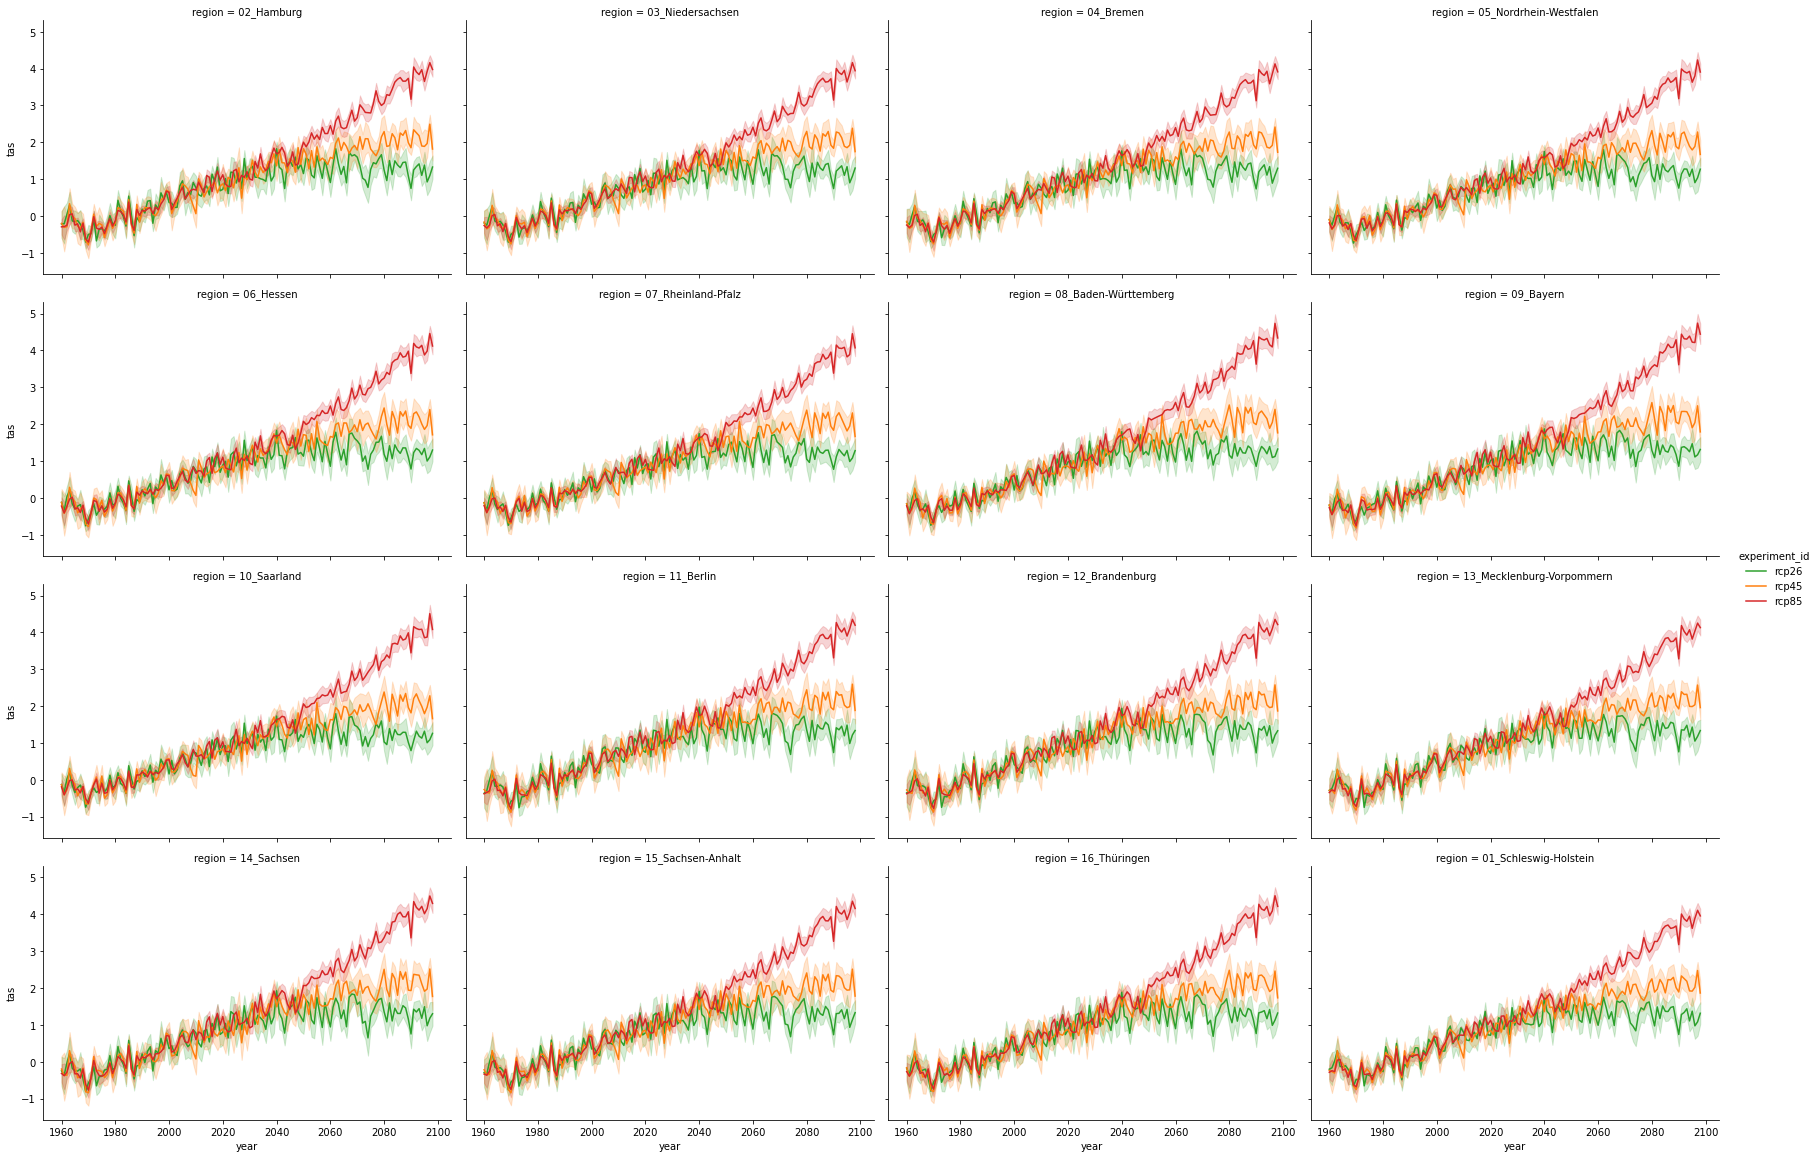

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
palette ={"historical": "C0", "rcp26": "C2", "rcp45": "C1", "rcp85": "C3"}
g = sns.relplot(data=df,
            x="year", y="tas", hue="experiment_id", col="region", col_wrap=4,
            kind="line", ci=95, palette=palette, height=4, aspect=1.5);
#g.set(title="Model annual mean, standard deviation")